<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/Hall_zeroB_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall: Measurements at zero magnetic field


Evgeny Kolonsky 2025

v.0.1.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests

# The model with misalignment factor $\beta$

$$
U_H' = U_H + \beta U_p + U_0
\tag{1}
$$
where $U_H'$ is observed voltage measured on the Hall pins of the `PHYWE Hall unit`, $U_H$ is "pure" hall voltage, having zero value at zero magnetic field, $U_p$ is longitudal voltage, measured on longitudal pins of the unit, and $U_0$ is Hall voltage offset, which can be modified with `Uh comp` regulator on the unit, and $\beta$ is misalignment factor, explaining longitudal voltage leak to the Hall contacts of the unit.

At zero magnetic field the measured Hall voltage expected to be a linear function of longitudal voltage with slope $\beta$:
$$
U_H' = \beta U_p + U_0, \quad \text{when}\quad B\equiv 0.
\tag{2}
$$


# Misalignment factor $\beta$ as slope $U_H'(U_p)$ at $B = 0$

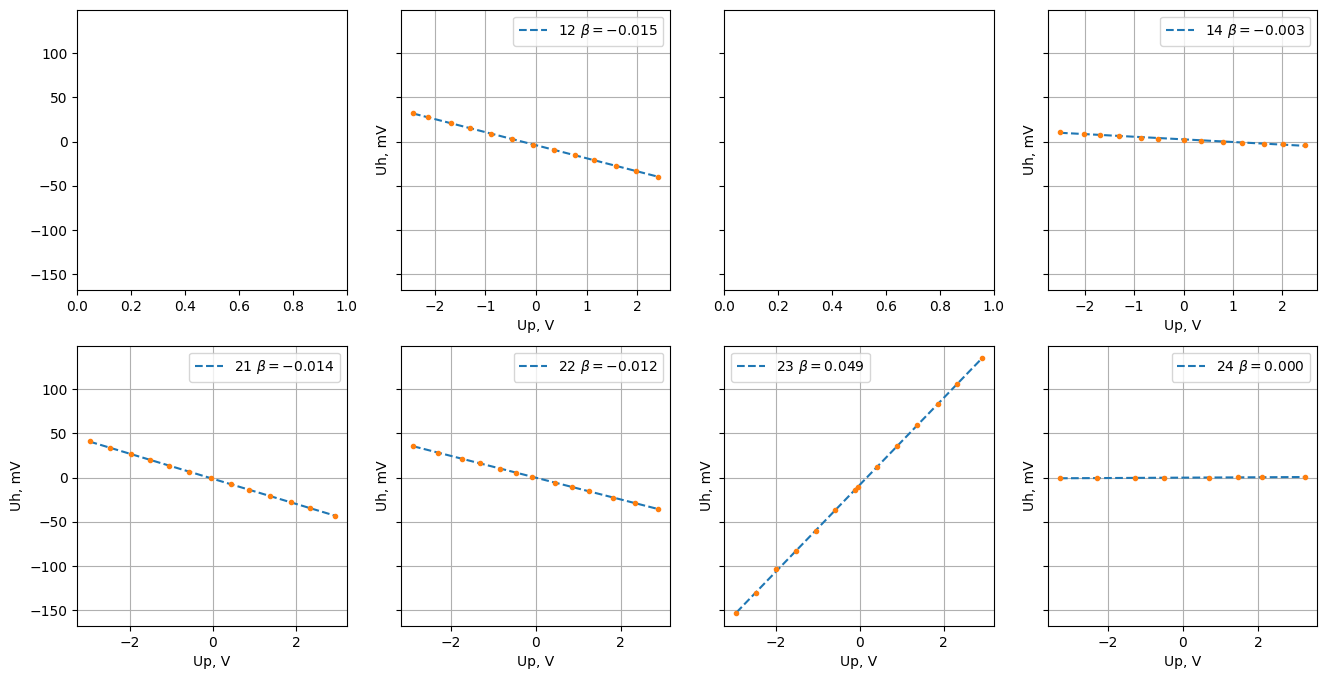

In [18]:
names = ['12',  '14', '21', '22', '23', '24']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/zero{name}.txt'
  response = requests.get(url)
  Ip, Up, Uh = np.genfromtxt(response.text.splitlines()).T
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_xlabel('Up, V')
  axx.set_ylabel('Uh, mV')

  fit = linregress(Up, Uh)
  beta = fit.slope
  axx.plot(Up/1000, fit.intercept + fit.slope *Up, '--', label=rf'{name} $\beta ={beta:.3f}$')
  axx.plot(Up/1000, Uh, '.')
  axx.legend()
  axx.grid()
#ax[0,0].remove()
#ax[0,2].remove()




# Longitudal resistance $R$ as slope $U_p(I_p)$

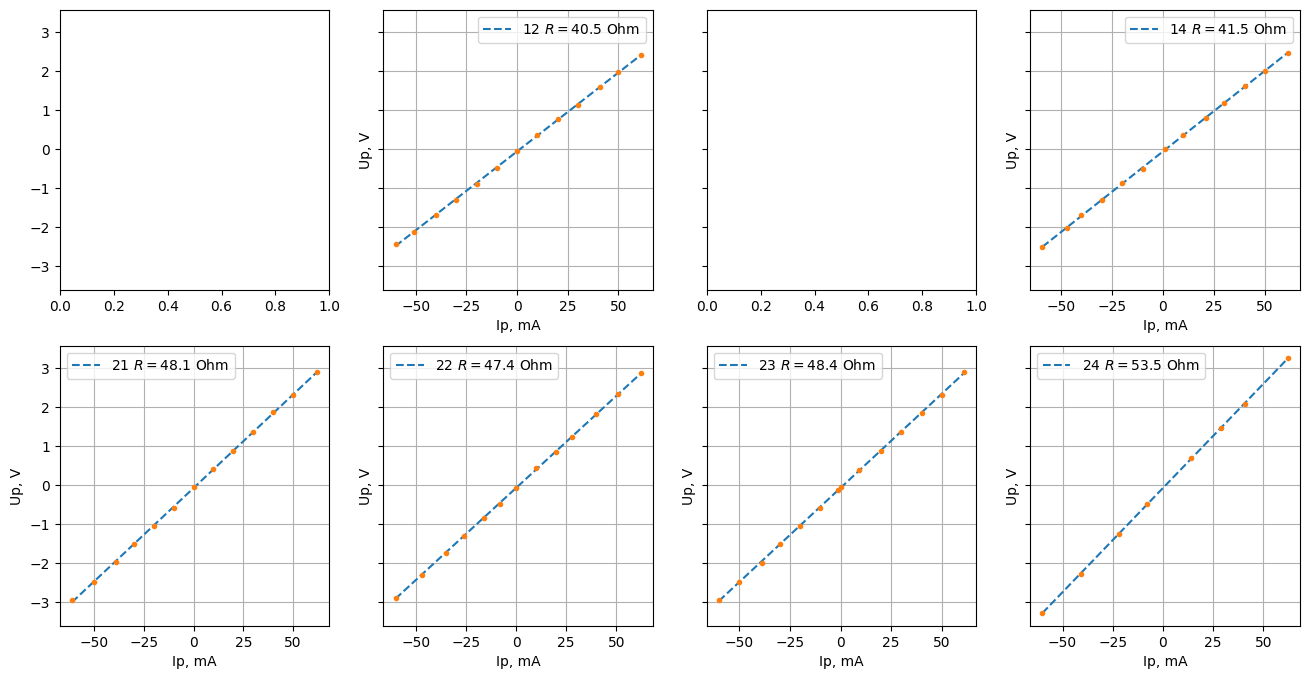

In [20]:
names = ['12',  '14', '21', '22', '23', '24']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/zero{name}.txt'
  response = requests.get(url)
  Ip, Up, Uh = np.genfromtxt(response.text.splitlines()).T
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_xlabel('Ip, mA')
  axx.set_ylabel('Up, V')

  fit = linregress(Ip, Up)
  R = fit.slope
  Up_fit = fit.intercept + fit.slope *Ip
  axx.plot(Ip, Up_fit / 1000, '--', label=rf'{name} $R ={R:.1f}$ Ohm')
  axx.plot(Ip, Up /1000, '.')
  axx.legend()
  axx.grid()
#ax[0,0].remove()
#ax[0,2].remove()

